In [1]:
# library import
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# read stocks.csv file into a dataframe called stocks
stocks <- read.csv('stocks.csv')
head(stocks)

,ax_ticker,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJUSTED,Date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,A2M.AX,17.95,18.01,17.55,17.63,3301983,17.63,2020-06-09
2,A2M.AX,17.63,18.17,17.63,18.10,3696601,18.10,2020-06-10
3,A2M.AX,17.93,18.06,17.63,17.79,2765764,17.79,2020-06-11
4,A2M.AX,17.50,17.83,17.43,17.68,4624805,17.68,2020-06-12
5,A2M.AX,17.59,17.76,17.17,17.19,4069376,17.19,2020-06-15
6,A2M.AX,17.50,17.83,17.21,17.72,3927487,17.72,2020-06-16


In [3]:
summary(stocks)

  ax_ticker              OPEN             HIGH              LOW         
 Length:36936       Min.   :  0.01   Min.   :  0.011   Min.   :  0.010  
 Class :character   1st Qu.:  1.77   1st Qu.:  1.810   1st Qu.:  1.735  
 Mode  :character   Median :  3.95   Median :  4.010   Median :  3.890  
                    Mean   : 12.19   Mean   : 12.361   Mean   : 12.033  
                    3rd Qu.: 11.11   3rd Qu.: 11.290   3rd Qu.: 10.940  
                    Max.   :320.00   Max.   :320.420   Max.   :317.510  
                    NA's   :169      NA's   :169       NA's   :169      
     CLOSE            VOLUME             ADJUSTED           Date          
 Min.   :  0.01   Min.   :        0   Min.   :  0.010   Length:36936      
 1st Qu.:  1.77   1st Qu.:   551738   1st Qu.:  1.769   Class :character  
 Median :  3.95   Median :  1481726   Median :  3.950   Mode  :character  
 Mean   : 12.19   Mean   :  3279685   Mean   : 12.178                     
 3rd Qu.: 11.12   3rd Qu.:  3904109   3rd

In [4]:
# Q1, there are a few NA values, let's drop them using drop_na function
stocks <- stocks %>%
  drop_na()

In [5]:
# Q2, let's create a new column called MONEY_VOLUME, the formula is ((OPEN + CLOSE) * VOLUME)/2
stocks <- stocks  %>% mutate(MONEY_VOLUME = ((OPEN + CLOSE) * VOLUME)/2)

In [6]:
head(stocks)

,ax_ticker,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJUSTED,Date,MONEY_VOLUME
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,A2M.AX,17.95,18.01,17.55,17.63,3301983,17.63,2020-06-09,58742278
2,A2M.AX,17.63,18.17,17.63,18.10,3696601,18.10,2020-06-10,66039775
3,A2M.AX,17.93,18.06,17.63,17.79,2765764,17.79,2020-06-11,49396546
4,A2M.AX,17.50,17.83,17.43,17.68,4624805,17.68,2020-06-12,81350320
5,A2M.AX,17.59,17.76,17.17,17.19,4069376,17.19,2020-06-15,70766451
6,A2M.AX,17.50,17.83,17.21,17.72,3927487,17.72,2020-06-16,69163044


In [7]:
# Q3, which stock has the largest MONEY_VOLUME on which day?
stocks %>% arrange(desc(MONEY_VOLUME)) %>% head()

,ax_ticker,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJUSTED,Date,MONEY_VOLUME
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,CSL.AX,289.99,289.99,275.50,278.50,2219359,278.50,2020-06-09,630841688
2,CSL.AX,286.56,287.73,282.62,282.62,2128546,282.62,2020-09-18,605762899
3,CSL.AX,296.15,296.72,289.69,292.74,1932667,292.74,2020-06-26,569064119
4,BHP.AX,37.90,38.18,37.66,37.80,14636337,37.80,2020-09-18,553985363
5,CBA.AX,78.78,80.00,78.10,80.00,6969228,80.00,2020-11-20,553287007
6,CSL.AX,298.02,299.85,294.89,295.52,1861765,295.52,2020-08-21,552515979


In [8]:
# read industry file into a dataframe called ind
ind <- read.csv('industry.csv')
# add .AX sufix into Code column so it can join with stocks data
ind$Code <- paste0(ind$Code,'.AX')
head(ind)

,Code,Company,Sector,MarketCap,Weight
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,ABP.AX,Abacus Property Group,Real Estate,1653360000,0.10
2,AX1.AX,Accent Group Ltd,Consumer Discretionary,639757000,0.04
3,ABC.AX,Adelaide Brighton Ltd,Materials,1780690000,0.11
4,APT.AX,Afterpay Ltd,Information Technology,8329580000,0.50
5,AGL.AX,AGL Energy Ltd,Utilities,10669800000,0.63
6,AQG.AX,Alacer Gold Corp,Materials,499400000,0.03


In [9]:
# apply summary on ind dataframe
summary(ind)

     Code             Company             Sector            MarketCap        
 Length:297         Length:297         Length:297         Min.   :9.296e+07  
 Class :character   Class :character   Class :character   1st Qu.:6.534e+08  
 Mode  :character   Mode  :character   Mode  :character   Median :1.477e+09  
                                                          Mean   :5.661e+09  
                                                          3rd Qu.:4.787e+09  
                                                          Max.   :1.405e+11  
     Weight      
 Min.   :0.0100  
 1st Qu.:0.0400  
 Median :0.0900  
 Mean   :0.3368  
 3rd Qu.:0.2800  
 Max.   :8.3600  

In [10]:
### Q4: find out the top 5 stock codes with the largest MarketCap, assign it to top_ind dataframe
top_ind <- ind %>% arrange(desc(MarketCap))  %>% head(5)

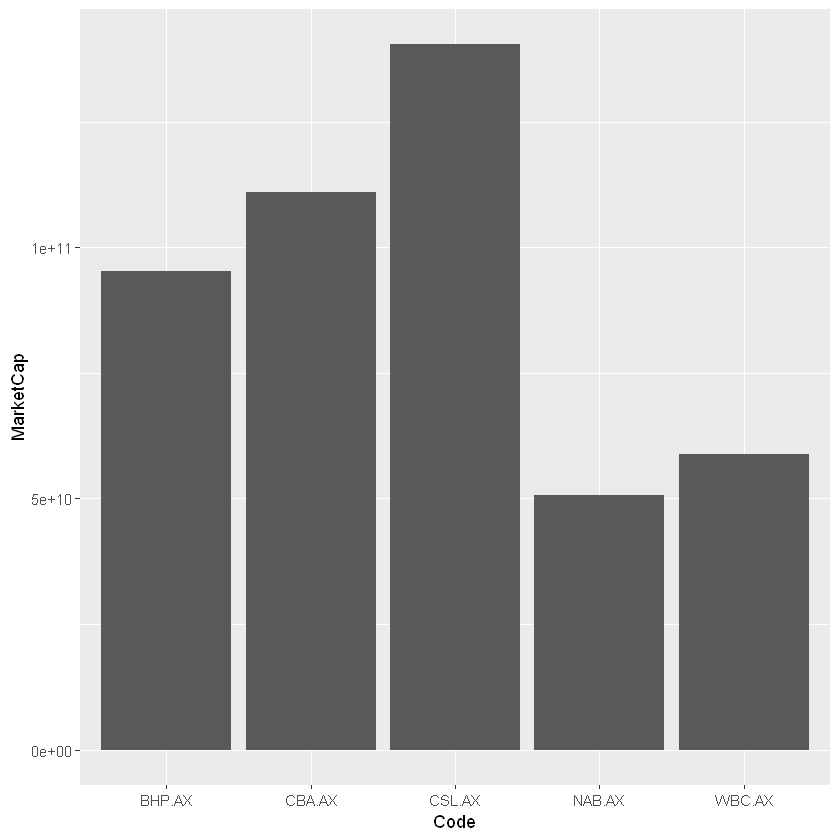

In [11]:
### Q5, plot a barchart for top_ind dataframe, with x axis = Code, y axis = MarketCap
ggplot(top_ind, aes(x=Code, y=MarketCap)) + geom_bar(stat="identity")

## Part 2

In [12]:
# use stocks dataframe to left join with ind dataframe, by ax_ticker and Code column
df <- stocks %>% left_join(ind, by=c('ax_ticker' = 'Code'))

In [13]:
# have a look at the new data frame
head(df)

,ax_ticker,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJUSTED,Date,MONEY_VOLUME,Company,Sector,MarketCap,Weight
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,A2M.AX,17.95,18.01,17.55,17.63,3301983,17.63,2020-06-09,58742278,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8
2,A2M.AX,17.63,18.17,17.63,18.10,3696601,18.10,2020-06-10,66039775,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8
3,A2M.AX,17.93,18.06,17.63,17.79,2765764,17.79,2020-06-11,49396546,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8
4,A2M.AX,17.50,17.83,17.43,17.68,4624805,17.68,2020-06-12,81350320,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8
5,A2M.AX,17.59,17.76,17.17,17.19,4069376,17.19,2020-06-15,70766451,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8
6,A2M.AX,17.50,17.83,17.21,17.72,3927487,17.72,2020-06-16,69163044,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8


In [14]:
# create a new column called CLOSE_PRE which shows the previous day's CLOSE value for each stocks
df <- df  %>% group_by(ax_ticker) %>% arrange(ax_ticker,Date) %>% mutate(CLOSE_PRE = lag(CLOSE))

In [15]:
# create a new column called chg which shows the percentage change on CLOSE from previous day
df <- df  %>% mutate(chg = (CLOSE - CLOSE_PRE)/CLOSE)

In [16]:
head(df)

ax_ticker,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJUSTED,Date,MONEY_VOLUME,Company,Sector,MarketCap,Weight,CLOSE_PRE,chg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A2M.AX,17.95,18.01,17.55,17.63,3301983,17.63,2020-06-09,58742278,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,NA,NA
A2M.AX,17.63,18.17,17.63,18.10,3696601,18.10,2020-06-10,66039775,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.63,0.025966906
A2M.AX,17.93,18.06,17.63,17.79,2765764,17.79,2020-06-11,49396546,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,18.10,-0.017425463
A2M.AX,17.50,17.83,17.43,17.68,4624805,17.68,2020-06-12,81350320,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.79,-0.006221776
A2M.AX,17.59,17.76,17.17,17.19,4069376,17.19,2020-06-15,70766451,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.68,-0.028504885
A2M.AX,17.50,17.83,17.21,17.72,3927487,17.72,2020-06-16,69163044,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.19,0.029909595


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



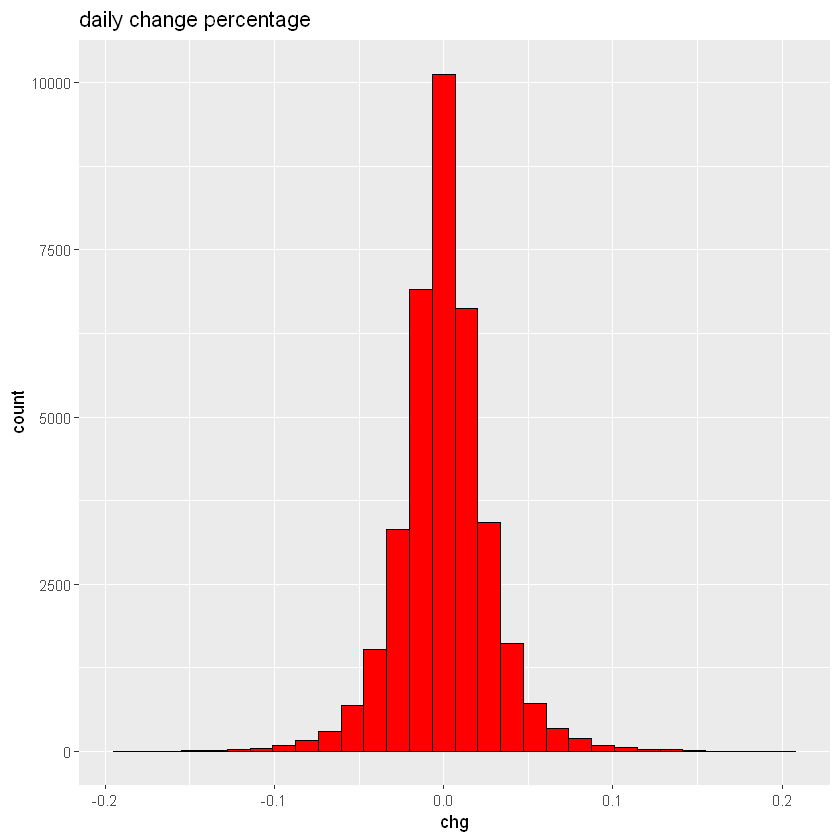

In [17]:
# plot the distribution of the column chg, only filter on abs(chg) < 20%
ggplot(aes(x=chg), data = df %>% filter(abs(chg) < 0.2))+
    geom_histogram(color =I('black'),fill = "red")+
    ggtitle('daily change percentage')

## Part 3

In [19]:
library(randomForest)
library(precrec)

In [20]:
## Q1: add columns chg1, which is the chg value for previous day, chg2 which is the chg value at two days ago, chg3 which is the chg value at three days ago and chg4 which is the chg value at four days ago
## add a column called target which has value 1 if CLOSE value increased for the next day, otherwise set it to 0. Replace xxx with your code 
## hint: use lag, lead and ifelse function
df <- df  %>% group_by(ax_ticker) %>% arrange(ax_ticker,Date) %>% mutate(chg1 = lag(chg), chg2 = lag(chg,2), chg3 = lag(chg,3), chg4 = lag(chg,4), target = ifelse(lead(CLOSE) - CLOSE > 0, 1, 0))

In [21]:
# you should see something similar to below
head(df)

ax_ticker,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJUSTED,Date,MONEY_VOLUME,Company,Sector,MarketCap,Weight,CLOSE_PRE,chg,chg1,chg2,chg3,chg4,target
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M.AX,17.95,18.01,17.55,17.63,3301983,17.63,2020-06-09,58742278,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,NA,NA,NA,NA,NA,NA,1
A2M.AX,17.63,18.17,17.63,18.10,3696601,18.10,2020-06-10,66039775,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.63,0.025966906,NA,NA,NA,NA,0
A2M.AX,17.93,18.06,17.63,17.79,2765764,17.79,2020-06-11,49396546,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,18.10,-0.017425463,0.025966906,NA,NA,NA,0
A2M.AX,17.50,17.83,17.43,17.68,4624805,17.68,2020-06-12,81350320,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.79,-0.006221776,-0.017425463,0.025966906,NA,NA,0
A2M.AX,17.59,17.76,17.17,17.19,4069376,17.19,2020-06-15,70766451,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.68,-0.028504885,-0.006221776,-0.017425463,0.02596691,NA,1
A2M.AX,17.50,17.83,17.21,17.72,3927487,17.72,2020-06-16,69163044,The a2 Milk Company Ltd,Consumer Staples,13479700000,0.8,17.19,0.029909595,-0.028504885,-0.006221776,-0.01742546,0.02596691,1


In [22]:
# Q2: build a dataframe which only select ax_ticker, Date, Weight, chg, chg1, chg2, chg3, chg4, target, drop any rows have NA value
# replace xxx with your code
df_model <- df %>% select(ax_ticker, Date, Weight, chg, chg1, chg2, chg3, chg4, target) %>% drop_na()

In [23]:
# you should see something similar to below
head(df_model)

ax_ticker,Date,Weight,chg,chg1,chg2,chg3,chg4,target
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M.AX,2020-06-16,0.8,0.02990960,-0.02850488,-0.006221776,-0.017425463,0.025966906,1
A2M.AX,2020-06-17,0.8,0.07225136,0.02990960,-0.028504885,-0.006221776,-0.017425463,1
A2M.AX,2020-06-18,0.8,0.01495611,0.07225136,0.029909595,-0.028504885,-0.006221776,0
A2M.AX,2020-06-19,0.8,-0.04415719,0.01495611,0.072251361,0.029909595,-0.028504885,0
A2M.AX,2020-06-22,0.8,-0.02370458,-0.04415719,0.014956112,0.072251361,0.029909595,0
A2M.AX,2020-06-23,0.8,-0.01002227,-0.02370458,-0.044157189,0.014956112,0.072251361,1


In [24]:
# change target variable to factor data type so we can build a classification model later on
df_model$target <- as.factor(df_model$target)

In [25]:
# split data into training and test by index
train = sample(1: nrow(df_model), nrow(df_model)/2)

In [26]:
# Q3: build a randomForest model on training data, note you need to drop ax_ticker and Date column before putting into model
# replace xxx with your codeset.seed (1)
model = randomForest(target∼., data=df_model[train,] %>% select(-ax_ticker, -Date), mtry=3, importance =TRUE)

Adding missing grouping variables: `ax_ticker`

Adding missing grouping variables: `ax_ticker`



In [27]:
# make a prediction on test data
tree.pred = predict(model, df_model[-train,] %>% select(-ax_ticker, -Date), type="prob")

Adding missing grouping variables: `ax_ticker`



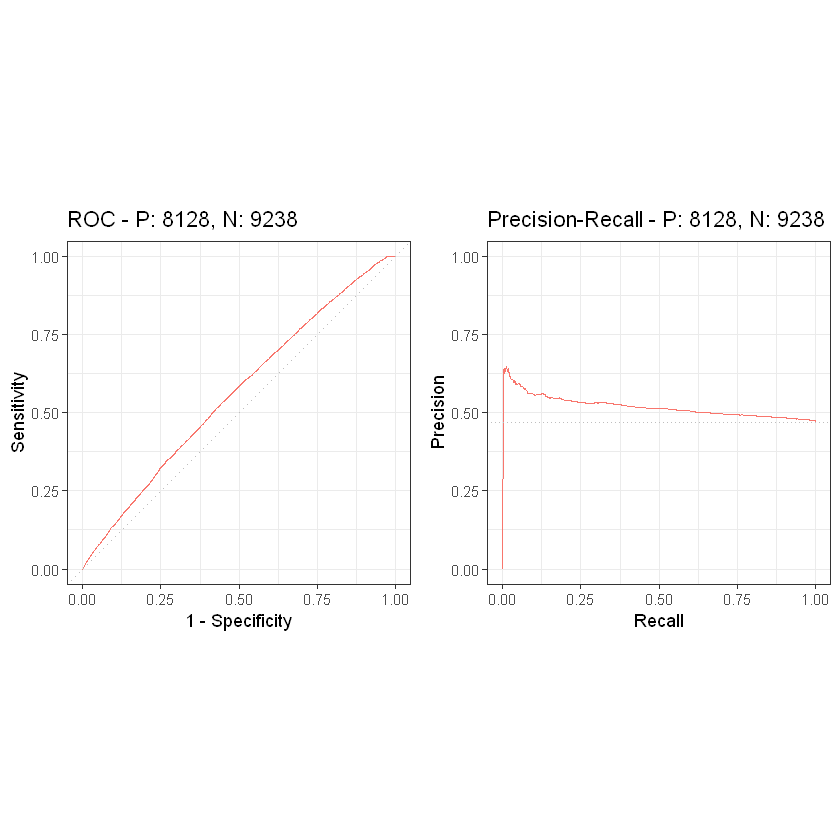

In [98]:
# Q5: plot ROC curve, replace xxx with your code
precrec_obj <- evalmod(scores = tree.pred[,2], labels = as.vector(df_model[-train,]$target))
autoplot(precrec_obj)

In [101]:
## Future work, as you can see, the model's performance is barely acceptable, can you add more features(columns) to imporve the model performance?